## <center>Підготовка та аналіз даних</center>
## <center>Лабораторна робота №4 (2 частина)</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [1]:
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

## Другий рівень

Завантажую дані, щоб переглянути, з чим я буду працювати, друкую перші 5 стрічок

In [2]:
file_name = r'Datasets\adult.data'
with open(file_name, 'r') as file:
    first_line = file.readline()
    print(first_line)
    for i in range(5):
        line = file.readline()
        if line:
            print(line)
        else:
            break

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K

50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K

38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K

53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K

28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K

37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K



Завантажую дані в DataFrame, вказую назви стовпців, які були вказані на сайті де я взяв датасет

In [3]:
def read_file(file_name):
    headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
           'Hours_per_week', 'Native_country', 'Income']
    df = pd.read_csv(file_name, sep=",", header=1, names=headers, na_values='?')
    return df

df = read_file(file_name)

time_taken = timeit.timeit(stmt='read_file(file_name)', globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

df

Execution time: 5.146881599968765 seconds


,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Дивлюсь типи даних в стовпцях

In [4]:
df.dtypes

Age                int64
Work_class        object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## Завдання 2

1. Поборотися із зниклими даними

Перевіряю чи є пропущені значення в датасеті

In [5]:
def has_question_mark_str(column):
    return column.astype(str).str.contains('\?', regex=True).any()

def has_question_mark_int(column):
    return column.astype(str).str.contains('\?', regex=True).any()

has_question_str = df.select_dtypes(include=['object']).apply(has_question_mark_str)
has_question_int = df.select_dtypes(include=['int']).apply(has_question_mark_int)

if has_question_str.any() or has_question_int.any():
    print("There are '?' values in the dataframe")
else:
    print("There are no '?' values in the dataframe")

There are '?' values in the dataframe


Прибираємо всі зниклі значення, тому що, в нас в датасеті використовуються реальні дані, і якщо їх спробувати вгадувати, або підставляти, статистика вийде не правильною

In [6]:
def data_cleaning(df):
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    df = df[~df.isin(['?']).any(axis=1)]
    return df

df = data_cleaning(df)

time_taken = timeit.timeit(stmt='data_cleaning(df)', globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

df 

Execution time: 7.328413399984129 seconds


,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Завдання 2
Пронормувати вибраний датасет (нормалізація має бути реалізована як окрема функція без застосування додаткових бібліотек, як наприклад 
sklearn.preprocessing).


In [7]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

Нормалізую дані в копії датафрейму

In [8]:
df_norm = df.copy()
df_norm['Hours_per_week'] = normalize(df['Hours_per_week'])
df_norm['Age'] = normalize(df['Age'])
df_norm['Final_weight'] = normalize(df['Final_weight'])
df_norm['Capital_gain'] = normalize(df['Capital_gain'])
df_norm['Capital_loss'] = normalize(df['Capital_loss'])

time_taken = timeit.timeit(stmt="normalize(df['Age'])", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

df_norm

Execution time: 0.07829690002836287 seconds


,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.287671,Private,0.137244,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.493151,Private,0.150212,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
2,0.150685,Private,0.220703,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
3,0.273973,Private,0.184109,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States,<=50K
4,0.438356,Private,0.099541,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,0.136986,Private,0.165563,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32555,0.315068,Private,0.095589,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32556,0.561644,Private,0.093914,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32557,0.068493,Private,0.127620,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


## Завдання 3

3. Збудувати гістограму по одному із атрибутів, що буде показувати на 
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте

In [9]:
def unique_values(column):
    unique_value = df_norm[column].unique()
    num_unique_value = df_norm[column].nunique()
    return unique_value, num_unique_value
min_value_hours = df_norm['Hours_per_week'].min()
max_value_hours = df_norm['Hours_per_week'].max()

Діапазони значень визначаються окремою функцією

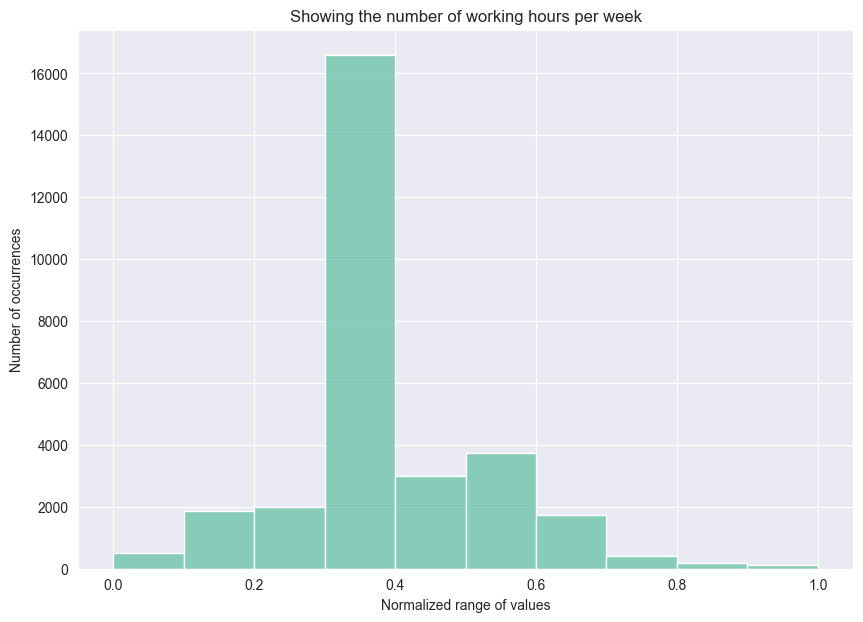

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))
with sns.color_palette("Set2"):
    sns.histplot(df_norm['Hours_per_week'], bins=10, binrange=(min_value_hours, max_value_hours))
    # sns.histplot(df['Hours_per_week'], bins=10, binrange=(min_value_hours, max_value_hours))

plt.xlabel('Normalized range of values')
plt.ylabel('Number of occurrences')
plt.title('Showing the number of working hours per week')
plt.show()

## Завдання 4

4. Збудувати графік залежності одного integer/real атрибута від іншого.

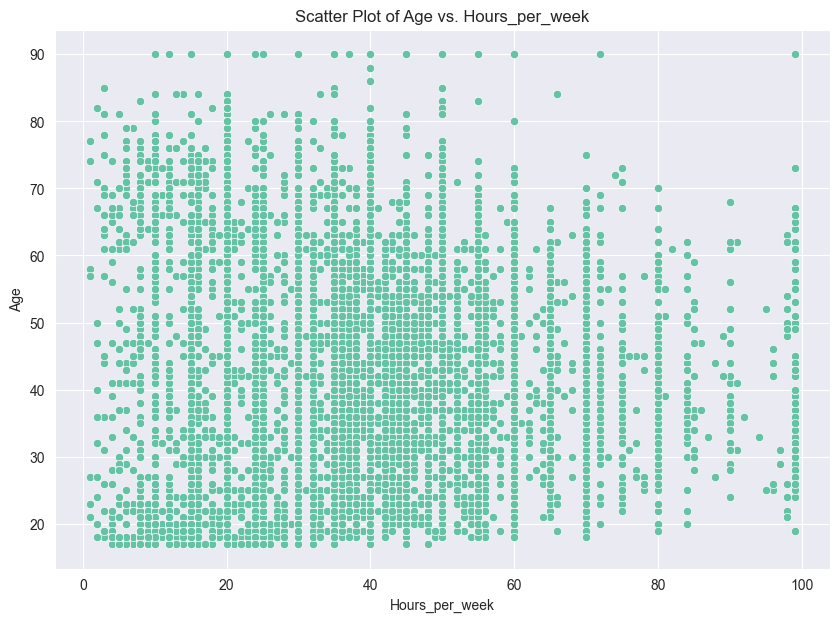

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))

with sns.color_palette("Set2"):
    sns.scatterplot(data=df, x='Hours_per_week', y='Age')
#   sns.lineplot(data=df, x='Hours_per_week', y='Age')

plt.xlabel('Hours_per_week')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Hours_per_week')
plt.show()

## Завдання 5

5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів

Коефіцієнт кореляції Пірсона вимірює ступінь лінійної залежності між двома змінними. Він приймає значення від -1 до 1.
<br>1 - позитивна залежність
<br>-1 - негативна залежність

Коефіцієнт кореляції Спірсона вимірює ступінь монотонної залежності між двома змінними. Він приймає значення від -1 до 1.
<br>1 - позитивна залежність
<br>-1 - негативна залежність

In [12]:
def pearson_corr():
    pearson_corr = df['Age'].corr(df['Hours_per_week'], method='pearson')
    return pearson_corr

time_taken = timeit.timeit(stmt="pearson_corr()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(f'Pearson\'s correlation coefficient: {pearson_corr()}')

Execution time: 0.05387229996267706 seconds
Pearson's correlation coefficient: 0.10167740116970088


In [13]:
def spearman_corr():
    spearman_corr = df['Hours_per_week'].corr(df['Age'], method='spearman')
    return spearman_corr

time_taken = timeit.timeit(stmt="spearman_corr()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(f'Spearson\'s correlation coefficient: {spearman_corr()}')

Execution time: 0.4058091000188142 seconds
Spearson's correlation coefficient: 0.155996996741013


## Завдання 6

6. Провести One Hot Encoding категоріального string атрибуту

Спочатку дивимось на унікальні значення в стовпці 'Relationship'

In [14]:
unique_value = unique_values('Relationship')[0]
num_unique_value = unique_values('Relationship')[1]
print(f'Unique values: {unique_value}')
print(f'Number of unique values: {num_unique_value}')

Unique values: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Number of unique values: 6


Додаємо нові стовпці, які будуть відповідати кожному унікальному значенню в стовпці 'Relationship'

In [15]:
def one_hot_encoding():
    for value in unique_value:
        df[f'Relationship_{value}'] = df['Relationship'].apply(lambda x: 1 if x == value else 0)

one_hot_encoding()

time_taken = timeit.timeit(stmt="one_hot_encoding()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

df

Execution time: 4.444649100012612 seconds


,Age,Work_class,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Capital_loss,Hours_per_week,Native_country,Income,Relationship_Not-in-family,Relationship_Husband,Relationship_Wife,Relationship_Own-child,Relationship_Unmarried,Relationship_Other-relative
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,1,0,0,0,0,0
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0,1,0,0,0,0
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0,0,1,0,0,0
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,0,0,1,0,0,0
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0,16,Jamaica,<=50K,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,<=50K,0,0,1,0,0,0
32555,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,>50K,0,1,0,0,0,0
32556,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,<=50K,0,0,0,0,1,0
32557,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,20,United-States,<=50K,0,0,0,1,0,0


In [16]:
headers = ['Age', 'Work_class', 'Final_weight', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
           'Hours_per_week', 'Native_country', 'Income']
rs = round(df[headers].describe(),2)
rs

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30160.00,30160.00,30160.00,30160.00,30160.00,30160.00
mean,38.44,189801.09,10.12,1092.01,88.38,40.93
std,13.13,105652.72,2.55,7406.59,404.31,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117632.50,9.00,0.00,0.00,40.00
50%,37.00,178430.00,10.00,0.00,0.00,40.00
75%,47.00,237634.00,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


## Завдання 7

7. Провести візуалізацію багатовимірних даних

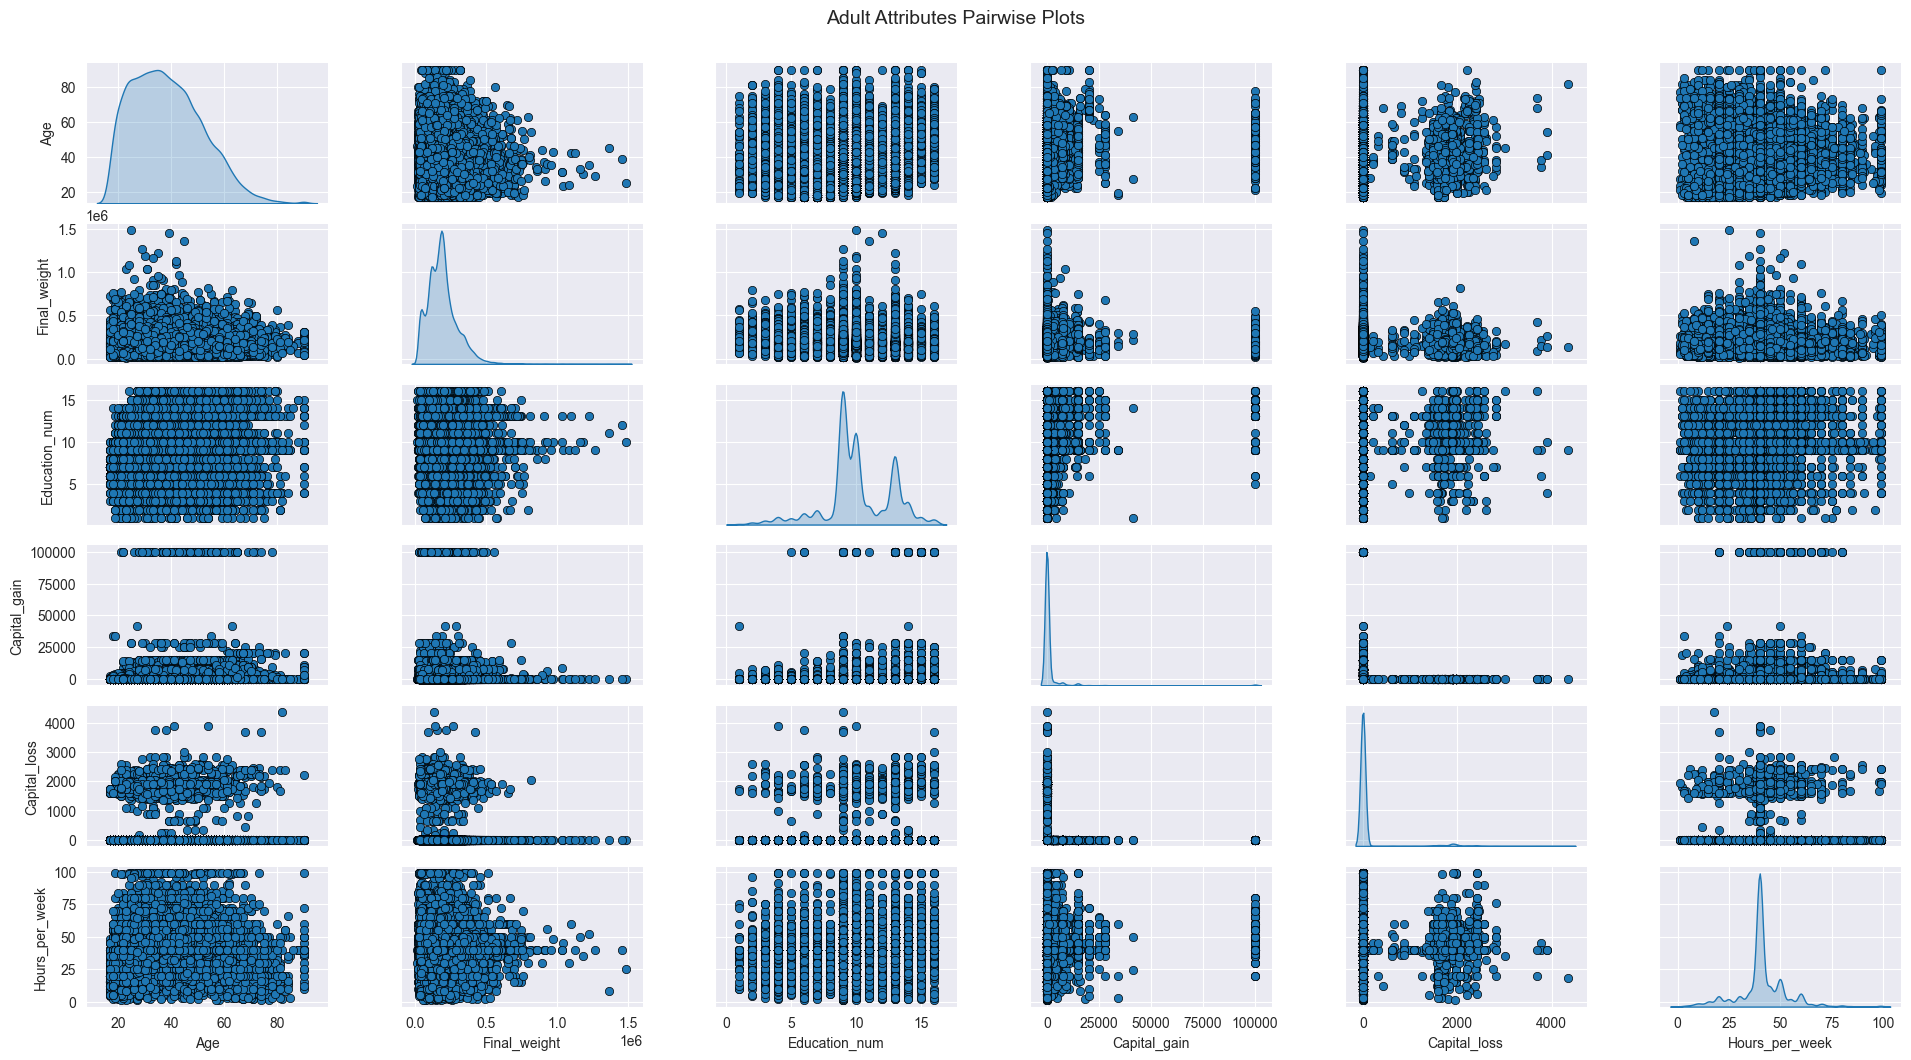

In [17]:
cols = ['Age', 'Final_weight', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Adult Attributes Pairwise Plots', fontsize=14)